# Phosphorus genes diamond jupyter using PCycDB

This notebook is part of the analysis of the TotalRNA mRNA genes from Trinity. 

## How to run Jupyter notebooks in huginn
<details>
<summary>Click to expand!</summary>

If you use vs-code you can use the [remote ssh extension](https://marketplace.visualstudio.com/items?itemName=ms-vscode-remote.remote-ssh) to connect to huginn and either run jupyterlab in the remote server (so to say, just like you would do in your local computer with `jupyter-lab`) or run directly without opening jupyterlab directly. 

Otherwise, you can follow the instructions below: 

1. Turn on VPN
2. Open two terminals (let's called A and B)
3. With terminal A, connect to huginn with ssh as usual
```bash
ssh username@huginn.au.dk
```
4. Move to the directory where you want to work, activate the conda enviroment and run jupyter notebook or jupyter lab:
```bash
conda activate jupyter-diamond
jupyter notebook --no-browser --port=7777
```
5. With terminal B, connect to huginn and forward the port specified port to your local computer
```bash
ssh -Y -N -L localhost:7777:localhost:7777 username@huginn.au.dk
```
6. Open your browser and go to `localhost:7777` and you should see the jupyter notebook running in huginn. You can also press in the url of Terminal A. 

Troubleshooting:
- If you get an error like `bind: Address already in use` it means that you have another jupyter notebook running in the same port. You can either kill the process or change the port.
</details>

## How to create a new environment for this notebook (if needed)

We will use Diamond, a few python basic libraries and bash. Let's check if those dependencies are installed. If not, you can install them with mamba (as well with jupyterlab)

```bash
# To create a new environment with mamba
mamba create -c bioconda -c conda-forge diamond pandas matplotlib jupyterlab -n jupyter-diamond
# To activate the environment
conda activate jupyter-diamond
```

### Sanity check

In [1]:
%%bash
diamond --version
python -c "import pandas; print(pandas.__version__)"
python -c "import matplotlib; print(matplotlib.__version__)"
bash --version | head -n 1

diamond version 2.1.8


2.1.1
3.8.0
GNU bash, version 4.4.20(1)-release (x86_64-pc-linux-gnu)


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Input files (edit this chunk)
Edit this chunk to match your input files

In [3]:
trinity_file = '../data/contigs.fasta'
count_table = '../data/mapped_reads_to_contigs.tsv'

In [4]:
## Sanity check: trinity and count table exit
assert os.path.exists(trinity_file), 'Trinity file does not exist'
assert os.path.exists(count_table), 'Count table does not exist'

### Output files (edit this chunk)
Edit this chunk to match your desired output files

In [5]:
outfile_matches = '../results/PCycDB_matches.tsv'

### Database files
Don't edit this chunk

In [6]:
database = '/data_2/Databases/PCycDB/release_v1.1/PCycDBv1.1.dmnd'
fasta = '/data_2/Databases/PCycDB/release_v1.1/PCycDBv1.1.faa'
annotation_file = '/data_2/Databases/PCycDB/release_v1.1/id2genemap.txt'
assert os.path.exists(annotation_file), 'Annotation file does not exist'
assert os.path.exists(fasta), 'Fasta file does not exist'
assert os.path.exists(database), 'Database file does not exist'

##### Run Diamond

According to the authors of the paper, they propose two cutoffs: 30% identity and 25 amino, and a more strict 70% identity and 25 amino acid length. We are going to go with the more strict cutoff. This means the default diamond parameters are fine, but to use the less strict cutoff we would need to use a more sensitive mode. 

In [7]:
%%bash -s "$database" "$trinity_file" "$outfile_matches"
if [ ! -f $3 ]; then
diamond blastx -p 50 -d $1 -q $2 -o $3 2> /dev/null
fi
head $3

TRINITY_DN226477_c0_g1_i1	16130432	100	525	0	0	1	1575	1	525	0.0	1063
TRINITY_DN226477_c0_g1_i1	15832623	99.8	525	1	0	1	1575	1	525	0.0	1063
TRINITY_DN226477_c0_g1_i1	B7LKD4	99.8	525	1	0	1	1575	1	525	0.0	1063
TRINITY_DN226477_c0_g1_i1	Q83QL1	99.6	525	2	0	1	1575	1	525	0.0	1062
TRINITY_DN226477_c0_g1_i1	B7UGU5	99.6	525	2	0	1	1575	1	525	0.0	1062
TRINITY_DN226477_c0_g1_i1	560158362	99.8	525	1	0	1	1575	1	525	0.0	1061
TRINITY_DN226477_c0_g1_i1	A7ZPV1	99.6	525	2	0	1	1575	1	525	0.0	1061
TRINITY_DN226477_c0_g1_i1	Q0T212	99.4	525	3	0	1	1575	1	525	0.0	1061
TRINITY_DN226477_c0_g1_i1	Q31XY3	99.6	525	2	0	1	1575	1	525	0.0	1061
TRINITY_DN226477_c0_g1_i1	Q3YZ45	99.6	525	2	0	1	1575	1	525	0.0	1060


##### Preprocessing diamond matches
We read the file into a pandas table:

In [8]:
diamond = pd.read_csv(
    outfile_matches, delimiter='\t',comment='#', header=None,
    names= ['Query id', 'Subject id', '% identity', 'alignment length', 
             'mismatches','gap openings','q. start', 'q. end',
             's. start', 's. end', 'e-value', 'score'
            ]
)
diamond

,Query id,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
0,TRINITY_DN226477_c0_g1_i1,16130432,100.0,525,0,0,1,1575,1,525,0.000000e+00,1063.0
1,TRINITY_DN226477_c0_g1_i1,15832623,99.8,525,1,0,1,1575,1,525,0.000000e+00,1063.0
2,TRINITY_DN226477_c0_g1_i1,B7LKD4,99.8,525,1,0,1,1575,1,525,0.000000e+00,1063.0
3,TRINITY_DN226477_c0_g1_i1,Q83QL1,99.6,525,2,0,1,1575,1,525,0.000000e+00,1062.0
4,TRINITY_DN226477_c0_g1_i1,B7UGU5,99.6,525,2,0,1,1575,1,525,0.000000e+00,1062.0
5,TRINITY_DN226477_c0_g1_i1,560158362,99.8,525,1,0,1,1575,1,525,0.000000e+00,1061.0
6,TRINITY_DN226477_c0_g1_i1,A7ZPV1,99.6,525,2,0,1,1575,1,525,0.000000e+00,1061.0
7,TRINITY_DN226477_c0_g1_i1,Q0T212,99.4,525,3,0,1,1575,1,525,0.000000e+00,1061.0
8,TRINITY_DN226477_c0_g1_i1,Q31XY3,99.6,525,2,0,1,1575,1,525,0.000000e+00,1061.0
9,TRINITY_DN226477_c0_g1_i1,Q3YZ45,99.6,525,2,0,1,1575,1,525,0.000000e+00,1060.0


We also add the count table into a Pandas data frame:

In [9]:
counts = pd.read_csv(
    count_table, sep = "\t", comment='#'
).set_index('ContigID')
counts

,SampleA,SampleB,SampleC,SampleD,SampleE
ContigID,,,,,
TRINITY_DN226500_c0_g1_i1,0,0,2,1,0
TRINITY_DN226510_c0_g1_i1,1,0,0,0,5
TRINITY_DN226477_c0_g1_i1,0,0,0,0,0
TRINITY_DN226449_c0_g1_i1,0,0,2,0,0
TRINITY_DN226457_c0_g1_i1,3,6,0,0,0
TRINITY_DN226454_c0_g1_i1,0,0,0,9,0
TRINITY_DN226455_c0_g1_i1,0,2,0,0,2


##### Most significant hit per contig
First, we are going to drop unsignificant hits by E-value. We are setting a 0.0001 threshold.


Text(0.5, 1.0, 'E-value distribution before filtering')

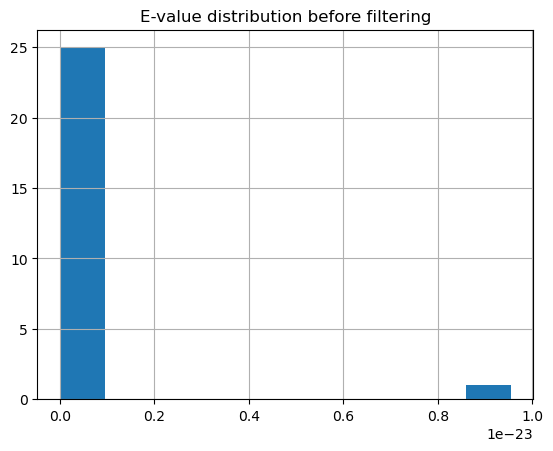

In [10]:
diamond.hist("e-value")
plt.title("E-value distribution before filtering")

Text(0.5, 1.0, 'E-value distribution after filtering (with threshold 0.0001)')

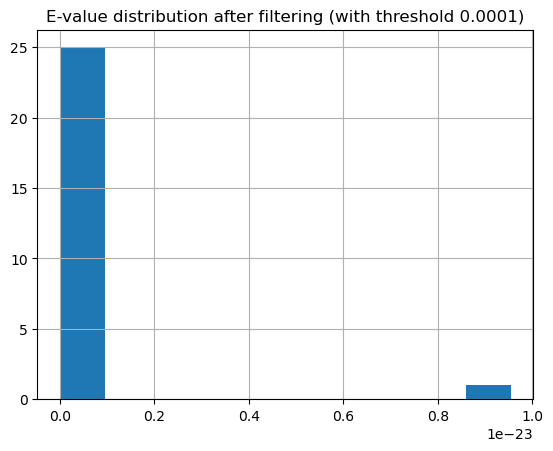

In [11]:
evalue_threshold = 0.0001
diamond = diamond.loc[diamond['e-value'] < evalue_threshold] 
diamond.hist("e-value")
plt.title(f"E-value distribution after filtering (with threshold {evalue_threshold})")


Now, we will sort rows per e-value and score and get the most significant hit per each ContigId.

Text(0.5, 1.0, 'Number of hits per contig before preprocessing')

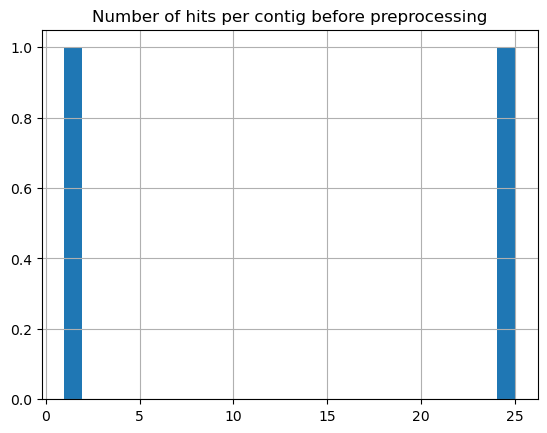

In [12]:
diamond.pivot_table(columns=['Query id'], aggfunc='size').hist(bins = 25)
plt.title("Number of hits per contig before preprocessing")


Number of rows. Before: 312. After: 22


Text(0.5, 1.0, 'Number of hits per contig after preprocessing')

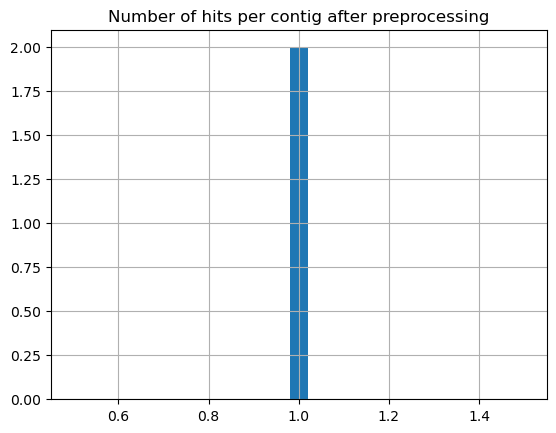

In [13]:
before = diamond.size
diamond = diamond.sort_values(
        by=['e-value', 'score'], ascending=[True, False]
        ).drop_duplicates(
    'Query id', keep='first'
).set_index('Query id')
after = diamond.size

print(f"Number of rows. Before: {before}. After: {after}")

diamond.pivot_table(columns=['Query id'], aggfunc='size').hist(bins = 25)
plt.title("Number of hits per contig after preprocessing")

#####  Inspect % identity and aligment length

Text(0.5, 1.0, 'Alignment length distribution after preprocessing')

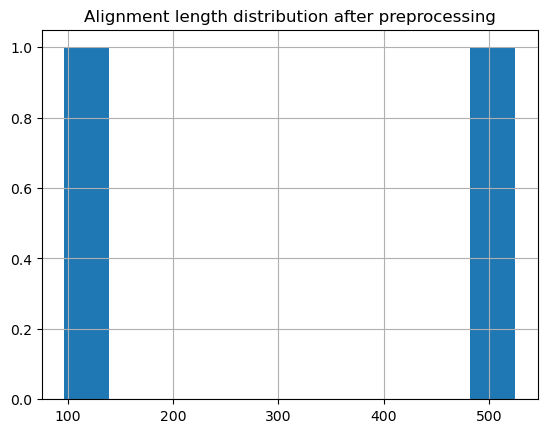

In [14]:
diamond.hist("alignment length")
plt.title("Alignment length distribution after preprocessing")


Text(0, 0.5, 'Mistmatches')

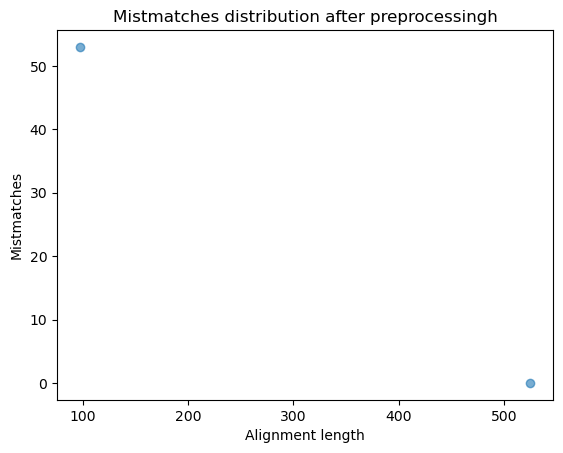

In [15]:
plt.scatter(diamond['alignment length'],diamond.mismatches,alpha=0.6)
plt.title('Mistmatches distribution after preprocessingh')
plt.xlabel('Alignment length')
plt.ylabel('Mistmatches')

Text(0.5, 1.0, 'Percentage of identity distribution after preprocessing')

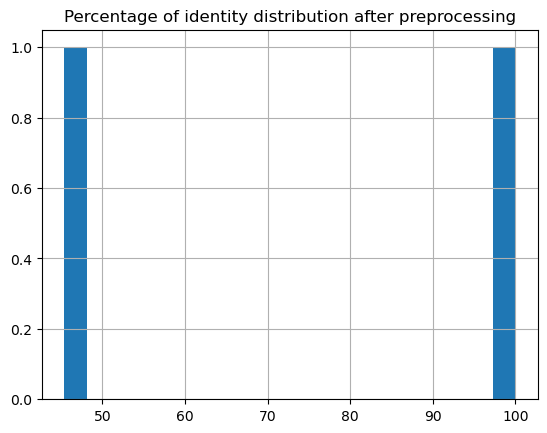

In [16]:
diamond.hist("% identity", bins = 20)
plt.title("Percentage of identity distribution after preprocessing")

Now, we filter the hits:

In [17]:
# Keep only hits with at least 70% identity
diamond = diamond.loc[diamond['% identity'] >= 70]
# Keep only hits with at least 25 alignment length
diamond = diamond.loc[diamond['alignment length'] >= 25]
diamond

,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
Query id,,,,,,,,,,,
TRINITY_DN226477_c0_g1_i1,16130432,100.0,525,0,0,1,1575,1,525,0.0,1063.0


##### Link information form diamond matches and count table
First, we are going to drop all columns except for ContigsID and orthologous genes header

In [18]:
map_table = diamond[["Subject id"]]
map_table

,Subject id
Query id,
TRINITY_DN226477_c0_g1_i1,16130432


Now, we will merge both files by their column in common (ContigID and Subject id).

In [19]:
df = pd.merge(map_table, counts, left_index=True, right_index=True).reset_index(drop=True)
df


,Subject id,SampleA,SampleB,SampleC,SampleD,SampleE
0,16130432,0,0,0,0,0


##### Aggregate table
Now, we are going to aggregate the rows by grouping them by "Subject id" (notice the difference in rows between the previous table and the following):

In [20]:
df = df.groupby('Subject id').sum(numeric_only = True)
df

,SampleA,SampleB,SampleC,SampleD,SampleE
Subject id,,,,,
16130432,0,0,0,0,0


Now, we have to annotate the table. Let's extract that info from the fasta header. See (this issue)[https://github.com/ZengJiaxiong/Phosphorus-cycling-database/issues/11] for more information.

In [21]:
%%bash -s "$fasta"
grep '>' < $1 | \
    # Change sequences following other format
    # This is the case of the sequences that have [gene=adk,souce=NCBI_archaea_refseq]
    sed 's/,souce/ ontology=unknown source/g' | \
    # Change case where there are spaces instead of _ such as'ADE2 homolog' to 'ADE2_homolog'
    sed 's/ homolog/_homolog/g' | \
    sed 's/gene=/description=/g' | \
    # Remove the '>' from the beginning of each line
    sed 's/>//g' | \
    # Remove []
    sed 's/\[//g' | sed 's/\]//g' | \
    # Remove 'description=', 'ontology=' and 'source='
    sed 's/description=//g' | sed 's/ontology=//g' | sed 's/source=//g' | sed 's/gene=//g' | \
    # Substitute spaces with ,
    sed 's/ /,/g' > id2gene_PCycDB.csv

In [22]:
annotations = pd.read_csv(
    'id2gene_PCycDB.csv',header=None, engine='python',
    names = ['name', 'gene', 'ontology', 'source']
    )
annotations

,name,gene,ontology,source
0,161934.XP_010688184.1,ADE2,COG0152,eggNOG
1,159749.K0RBF6,ADE2,COG0152,eggNOG
2,192875.XP_004363538.1,ADE2,COG0152,eggNOG
3,296587.XP_002506041.1,ADE2,COG0152,eggNOG
4,5297.GMQ_22454T0,ADE2,COG0152,eggNOG
...,...,...,...,...
1174929,55207.KP22_11735,lysR,COG0583,eggNOG
1174930,359.CN09_32225,lysR,COG0583,eggNOG
1174931,399741.Spro_1535,lysR,COG0583,eggNOG
1174932,642227.HA49_06910,lysR,COG0583,eggNOG


Now, we merge both tables by their column in common (Subject id and orthologous genes header)

In [23]:
df = df.merge(
    annotations, left_on='Subject id',
    right_on='name', how = 'left'
    ).set_index('name')

The database includes non-phosphorus genes (to reduce the number of false positives). Those entries either have no annotation, or have the keyword "homologous". We are going to remove them from the table:

In [24]:
# Remove rows with NA
df.dropna(inplace=True)
# Remove rows with keyword 'homologous'
df = df[~df['gene'].str.contains('homolog')]
df

,SampleA,SampleB,SampleC,SampleD,SampleE,gene,ontology,source
name,,,,,,,,
16130432,0,0,0,0,0,guaA,COG0519,COG


Finally, we save the table and remove the temporary files:

In [25]:
df.to_csv('../results/PCycDB_matches_annotated.tsv', sep='\t')

In [26]:
%%bash
rm id2gene_PCycDB.csv